In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/ICICIBANK.csv')

In [3]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,286260,2.095439e+12,NaN,NaN,NaN
1,2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,296264,2.173893e+12,NaN,NaN,NaN
2,2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,227624,1.612794e+12,NaN,NaN,NaN
3,2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,275149,1.982121e+12,NaN,NaN,NaN
4,2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,138809,9.538882e+11,NaN,NaN,NaN




*   Volume,Turnover,Trades are the metrics indicating trading activity
*   Prev Close, Open, High, Low, Last, Close: Stock price data.


*   Deliverable Volume, %Deliverble: Indicators of stock deliverability.





In [4]:
data.shape

(5306, 15)

 Analyze the indicators in the dataset that best explain the volatility and
 unpredictable nature of the stocks in the last decade.



*  Calculating volatility metrics:High-low % range,Daily Change %




In [5]:
data['Date']=pd.to_datetime(data['Date'])

In [6]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,286260,2.095439e+12,NaN,NaN,NaN
1,2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,296264,2.173893e+12,NaN,NaN,NaN
2,2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,227624,1.612794e+12,NaN,NaN,NaN
3,2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,275149,1.982121e+12,NaN,NaN,NaN
4,2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,138809,9.538882e+11,NaN,NaN,NaN


In [7]:
data['High-Low Range %'] = ((data['High'] - data['Low']) / data['Low']) * 100


In [8]:
data['Daily Change %'] = ((data['Close'] - data['Prev Close']) / data['Prev Close']) * 100


* Daily Change %: Indicates the percentage change in stock price from the previous close to the current close.
*  High-Low Range %:Represents the daily range as a percentage of the closing price.
The average daily range is approximately 3.54%, with a standard deviation of 2.55%.
Maximum observed daily range is 93.56%, suggesting highly volatile days.





In [9]:
df=data.loc[:,'Prev Close':]

In [10]:
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,69.20,74.35,74.75,71.40,74.75,74.75,73.20,286260,2.095439e+12,NaN,NaN,NaN,4.691877,8.020231
1,74.75,73.05,78.50,71.00,73.25,73.05,73.38,296264,2.173893e+12,NaN,NaN,NaN,10.563380,-2.274247
2,73.05,70.00,73.50,67.50,70.00,69.50,70.85,227624,1.612794e+12,NaN,NaN,NaN,8.888889,-4.859685
3,69.50,71.00,74.00,69.55,69.75,70.05,72.04,275149,1.982121e+12,NaN,NaN,NaN,6.398275,0.791367
4,70.05,69.00,72.50,66.00,67.00,67.40,68.72,138809,9.538882e+11,NaN,NaN,NaN,9.848485,-3.783012


In [11]:
new_df=data[(data['Date']>'2014-12-01')& (data['Date']<'2024-12-02')]#dataset of last decade

In [12]:
new_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
3719,2014-12-02,ICICIBANK,EQ,1758.15,1753.7,1775.20,1735.05,1772.8,1770.5,1760.04,2586919,4.553081e+14,85709.0,1168048.0,0.4515,2.314054,0.702443
3720,2014-12-03,ICICIBANK,EQ,1770.50,1765.1,1798.15,1760.15,1793.0,1794.1,1783.46,2194129,3.913151e+14,73132.0,1141395.0,0.5202,2.158907,1.332957
3721,2014-12-04,ICICIBANK,EQ,1794.10,362.5,366.05,358.35,361.4,362.2,362.06,12306921,4.455852e+14,126201.0,6575498.0,0.5343,2.148737,-79.811605
3722,2014-12-05,ICICIBANK,EQ,362.20,363.8,364.95,358.40,359.2,359.8,362.66,7771527,2.818413e+14,101233.0,5151213.0,0.6628,1.827567,-0.662617
3723,2014-12-08,ICICIBANK,EQ,359.80,360.9,362.00,352.60,354.2,353.8,356.05,5886966,2.096059e+14,132026.0,3537756.0,0.6009,2.665910,-1.667593


In [13]:
df=new_df.loc[:,'Prev Close':]

In [14]:
df.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
Prev Close,1.000000,0.946980,0.945891,0.946108,0.944981,0.945025,0.946058,0.095513,0.346647,0.281814,0.028086,-0.219592,-0.040958,-0.222074
Open,0.946980,1.000000,0.998870,0.999033,0.998017,0.998016,0.999059,0.110317,0.375061,0.304035,0.035311,-0.238606,-0.042534,0.004435
High,0.945891,0.998870,1.000000,0.998553,0.999174,0.999194,0.999606,0.129953,0.392116,0.323057,0.048458,-0.248460,-0.013554,0.025994
Low,0.946108,0.999033,0.998553,1.000000,0.999011,0.999054,0.999542,0.098586,0.365263,0.286953,0.028475,-0.232249,-0.065904,0.023345
Last,0.944981,0.998017,0.999174,0.999011,1.000000,0.999965,0.999575,0.116777,0.380698,0.304521,0.040665,-0.241622,-0.036861,0.042166
Close,0.945025,0.998016,0.999194,0.999054,0.999965,1.000000,0.999614,0.116548,0.380453,0.304409,0.040300,-0.241698,-0.037248,0.042658
VWAP,0.946058,0.999059,0.999606,0.999542,0.999575,0.999614,1.000000,0.114988,0.379385,0.304868,0.038997,-0.241231,-0.038522,0.028728
Volume,0.095513,0.110317,0.129953,0.098586,0.116777,0.116548,0.114988,1.000000,0.928667,0.806505,0.873153,-0.219098,0.577684,0.133228
Turnover,0.346647,0.375061,0.392116,0.365263,0.380698,0.380453,0.379385,0.928667,1.000000,0.798516,0.829021,-0.260646,0.456710,0.126923
Trades,0.281814,0.304035,0.323057,0.286953,0.304521,0.304409,0.304868,0.806505,0.798516,1.000000,0.529560,-0.385807,0.646523,0.068476


Correlation Analysis
High-Low Range %--



* Trades:Positive Correlation(0.64) between High-low range(%) and Trades
*  Volume:Positive Correlation(0.577).Increase in Volume lead to increase in Trades.  

*  Turnover:Positive Correlation(0.456).Increase in Turnover lead to increase in High-Low Range
*  Deliverable%:Negative Correlation(-0.28) between Deliverable Volume and High ow Range%








Daily Change % (Price Change Volatility):
* Turnover:Positive correlation(0.12) suggest a slight relationship between Turnover and Daily Change%.
* Trades: Positive correlation(0.068) suggest a slight relationship between Turnover and Daily Change%.

* Volume:Positive Correlation(0.133) suggest a positive relationship
*  Deliverable Volume:Positive Correlation(0.089)suggest a positive relationship between Deliverable Volume and Daily Change%.
   

Insights

1.  Trades and Volume are critical indicators of intraday volatility.
2.  Turnover slightly affects price volatility but has a stronger impact on intraday volatility.
3.%Deliverable inversely correlates with both volatility measures, potentially indicating that stocks with more speculative trading (lower deliverability) are more volatile

In [15]:
data.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


In [16]:
for col in data.columns:
  if data[col].dtype=='int64' or data[col].dtype=='float64':
    data[col]=data[col].fillna(data[col].mean())

In [17]:
data.isna().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


#Choose promising stock based on your analysis for your portfolio

In [18]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,286260,2.095439e+12,138367.627443,4.183406e+06,0.473463,4.691877,8.020231
1,2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,296264,2.173893e+12,138367.627443,4.183406e+06,0.473463,10.563380,-2.274247
2,2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,227624,1.612794e+12,138367.627443,4.183406e+06,0.473463,8.888889,-4.859685
3,2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,275149,1.982121e+12,138367.627443,4.183406e+06,0.473463,6.398275,0.791367
4,2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,138809,9.538882e+11,138367.627443,4.183406e+06,0.473463,9.848485,-3.783012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,ICICIBANK,EQ,569.95,602.00,605.50,588.00,588.70,591.10,596.22,62584522,3.731429e+15,546696.000000,1.691335e+07,0.270200,2.976190,3.710852
5302,2021-04-27,ICICIBANK,EQ,591.10,593.25,601.95,591.10,599.00,598.75,597.63,24239685,1.448630e+15,233412.000000,9.056247e+06,0.373600,1.835561,1.294197
5303,2021-04-28,ICICIBANK,EQ,598.75,598.00,622.80,598.00,619.70,621.35,612.57,33292864,2.039422e+15,295406.000000,1.401148e+07,0.420900,4.147157,3.774530
5304,2021-04-29,ICICIBANK,EQ,621.35,622.55,628.45,609.00,621.00,621.45,619.55,34537860,2.139792e+15,304029.000000,1.032490e+07,0.298900,3.193760,0.016094


In [19]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High-Low Range %', 'Daily Change %'],
      dtype='object')

In [20]:
# Calculate summary statistics by stock
stock_analysis = data.groupby('Symbol').agg({
    'Daily Change %': ['mean', 'std', lambda x: (x > 0).sum() / len(x)],  # Mean, Std Dev, and Positive Return Frequency
    'High-Low Range %': ['mean'],                                           # Mean volatility
    'Volume': ['mean'],                                                   # Mean trading volume
    '%Deliverble': ['mean'],                                              # Mean deliverable percentage
    'VWAP': ['mean']                                                      # Average VWAP
})

# Flatten column names
stock_analysis.columns = [
    'Mean Return (%)', 'Return Std Dev (%)', 'Positive Return Frequency',
    'Mean Volatility (%)', 'Mean Volume', 'Mean Deliverable (%)', 'Mean VWAP'
]

# Define thresholds or scores for the criteria
stock_analysis['Consistency Score'] = stock_analysis['Positive Return Frequency'] * 100  # Positive return frequency as a percentage
stock_analysis['Moderate Volatility Score'] = -abs(stock_analysis['Mean Volatility (%)'] - stock_analysis['Mean Volatility (%)'].median())
stock_analysis['High Volume Score'] = stock_analysis['Mean Volume'] / stock_analysis['Mean Volume'].max() * 100  # Volume as a percentage of the max volume
stock_analysis['Trend Score'] = stock_analysis['Mean Deliverable (%)'] + stock_analysis['Mean VWAP']  # Simplified trend measure

# Combine scores for overall ranking
stock_analysis['Overall Score'] = (
    stock_analysis['Consistency Score'] +
    stock_analysis['Moderate Volatility Score'] +
    stock_analysis['High Volume Score'] +
    stock_analysis['Trend Score']
)

# Rank stocks based on the overall score
stock_analysis['Rank'] = stock_analysis['Overall Score'].rank(ascending=False)

# Select the top stocks based on overall rank
top_consistent_stocks = stock_analysis.sort_values('Rank').head(5).reset_index()

# Display the top stocks
print(top_consistent_stocks[['Symbol', 'Mean Return (%)', 'Positive Return Frequency',
                             'Mean Volatility (%)', 'Mean Volume',
                             'Mean Deliverable (%)', 'Mean VWAP', 'Overall Score']])


      Symbol  Mean Return (%)  Positive Return Frequency  Mean Volatility (%)  \
0  ICICIBANK         0.094674                   0.498681             3.800477   

    Mean Volume  Mean Deliverable (%)   Mean VWAP  Overall Score  
0  8.224631e+06              0.473463  551.129031     701.470568  


In [21]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,286260,2.095439e+12,138367.627443,4.183406e+06,0.473463,4.691877,8.020231
1,2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,296264,2.173893e+12,138367.627443,4.183406e+06,0.473463,10.563380,-2.274247
2,2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,227624,1.612794e+12,138367.627443,4.183406e+06,0.473463,8.888889,-4.859685
3,2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,275149,1.982121e+12,138367.627443,4.183406e+06,0.473463,6.398275,0.791367
4,2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,138809,9.538882e+11,138367.627443,4.183406e+06,0.473463,9.848485,-3.783012


In [22]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,286260,2.095439e+12,138367.627443,4.183406e+06,0.473463,4.691877,8.020231
1,2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,296264,2.173893e+12,138367.627443,4.183406e+06,0.473463,10.563380,-2.274247
2,2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,227624,1.612794e+12,138367.627443,4.183406e+06,0.473463,8.888889,-4.859685
3,2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,275149,1.982121e+12,138367.627443,4.183406e+06,0.473463,6.398275,0.791367
4,2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,138809,9.538882e+11,138367.627443,4.183406e+06,0.473463,9.848485,-3.783012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,ICICIBANK,EQ,569.95,602.00,605.50,588.00,588.70,591.10,596.22,62584522,3.731429e+15,546696.000000,1.691335e+07,0.270200,2.976190,3.710852
5302,2021-04-27,ICICIBANK,EQ,591.10,593.25,601.95,591.10,599.00,598.75,597.63,24239685,1.448630e+15,233412.000000,9.056247e+06,0.373600,1.835561,1.294197
5303,2021-04-28,ICICIBANK,EQ,598.75,598.00,622.80,598.00,619.70,621.35,612.57,33292864,2.039422e+15,295406.000000,1.401148e+07,0.420900,4.147157,3.774530
5304,2021-04-29,ICICIBANK,EQ,621.35,622.55,628.45,609.00,621.00,621.45,619.55,34537860,2.139792e+15,304029.000000,1.032490e+07,0.298900,3.193760,0.016094


 Feature engineer and build machine learning solutions for the business
 Requirements

In [23]:
data['Cumulative_Return'] = data['Close'] / data['Close'].iloc[0] - 1  #cumilative returns over a period


In [24]:
data['Volume_Change'] = data['Volume'].pct_change()


In [25]:
#Moving averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()


In [26]:
data['Volatility'] = data['Daily Change %'].rolling(window=20).std()


In [27]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility
0,2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,...,138367.627443,4.183406e+06,0.473463,4.691877,8.020231,0.000000,NaN,NaN,NaN,NaN
1,2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,...,138367.627443,4.183406e+06,0.473463,10.563380,-2.274247,-0.022742,0.034947,NaN,NaN,NaN
2,2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,...,138367.627443,4.183406e+06,0.473463,8.888889,-4.859685,-0.070234,-0.231685,NaN,NaN,NaN
3,2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,...,138367.627443,4.183406e+06,0.473463,6.398275,0.791367,-0.062876,0.208787,NaN,NaN,NaN
4,2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,...,138367.627443,4.183406e+06,0.473463,9.848485,-3.783012,-0.098328,-0.495513,NaN,NaN,NaN


In [28]:
data['Target_Close'] = data['Close'].shift(-1)


In [29]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility,Target_Close
0,2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,...,4.183406e+06,0.473463,4.691877,8.020231,0.000000,NaN,NaN,NaN,NaN,73.05
1,2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,...,4.183406e+06,0.473463,10.563380,-2.274247,-0.022742,0.034947,NaN,NaN,NaN,69.50
2,2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,...,4.183406e+06,0.473463,8.888889,-4.859685,-0.070234,-0.231685,NaN,NaN,NaN,70.05
3,2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,...,4.183406e+06,0.473463,6.398275,0.791367,-0.062876,0.208787,NaN,NaN,NaN,67.40
4,2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,...,4.183406e+06,0.473463,9.848485,-3.783012,-0.098328,-0.495513,NaN,NaN,NaN,69.90


Mean Squared Error: 293.11978735053776
R2 Score: 0.9978549735803569


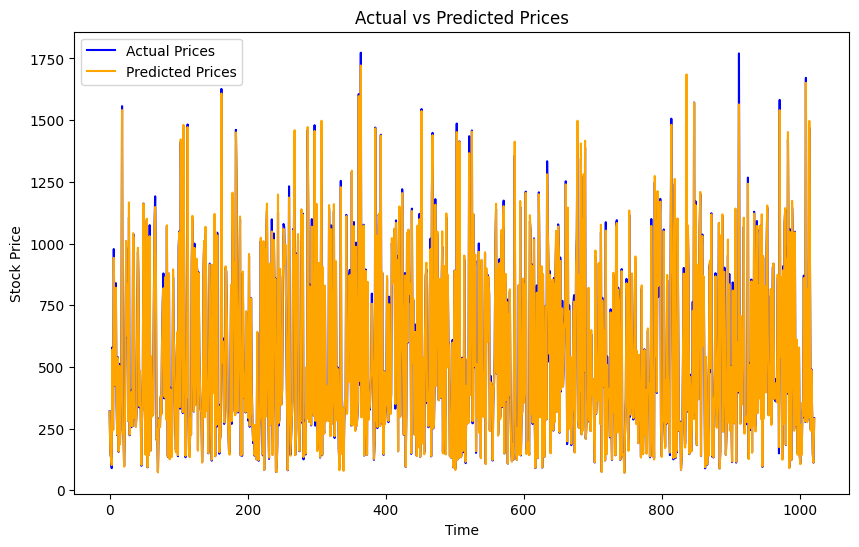

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])


# Feature Engineering
data['Daily_Return'] = data['Close'].pct_change()
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=20).std()

# Drop rows with NaN values generated from rolling calculations
data.dropna(inplace=True)
# Drop the last row with NaN target
data = data.dropna()

# Define Features (X) and Target (y)
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'SMA_20', 'SMA_50', 'Volatility']
X = data[features]
y = data['Target_Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Prices", color="blue")
plt.plot(y_pred, label="Predicted Prices", color="orange")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [31]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility,Target_Close,Daily_Return,SMA_20
199,2000-10-19,ICICIBANK,EQ,128.75,128.70,139.05,126.50,139.05,137.00,132.34,...,9.920949,6.407767,0.832776,0.515638,170.801,185.55100,19.316168,126.30,0.064078,137.9775
200,2000-10-20,ICICIBANK,EQ,137.00,145.00,145.00,125.55,128.00,126.30,129.14,...,15.491836,-7.810219,0.689632,1.092414,169.122,185.80875,18.608939,110.95,-0.078102,136.1875
201,2000-10-23,ICICIBANK,EQ,126.30,129.85,129.85,109.45,109.45,110.95,114.29,...,18.638648,-12.153603,0.484281,-0.263181,167.167,185.99825,18.720437,109.20,-0.121536,133.8650
202,2000-10-24,ICICIBANK,EQ,110.95,107.60,110.90,103.60,108.15,109.20,107.80,...,7.046332,-1.577287,0.460870,-0.246836,165.222,186.19675,18.189240,117.30,-0.015773,131.1850
203,2000-10-25,ICICIBANK,EQ,109.20,110.25,118.00,110.25,118.00,117.30,115.47,...,7.029478,7.417582,0.569231,0.036250,163.506,186.43300,16.182031,118.55,0.074176,128.6375


In [32]:
features=['Date','Close']

In [33]:
my_data=data[features]

In [34]:
my_data['Date']=pd.to_datetime(my_data['Date'])

<ipython-input-34-1a6f73018fcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Date']=pd.to_datetime(my_data['Date'])


In [35]:
my_data

,Date,Close
199,2000-10-19,137.00
200,2000-10-20,126.30
201,2000-10-23,110.95
202,2000-10-24,109.20
203,2000-10-25,117.30
...,...,...
5300,2021-04-23,569.95
5301,2021-04-26,591.10
5302,2021-04-27,598.75
5303,2021-04-28,621.35


In [36]:
my_data.index=my_data['Date']

In [37]:
del my_data['Date']

<Axes: xlabel='Date'>

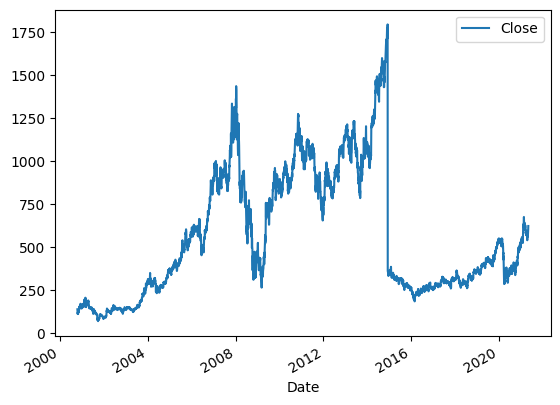

In [38]:
my_data.plot()

In [39]:
std_log=my_data.rolling(window=4).std()

In [40]:
mean_log=my_data.rolling(window=4).mean()

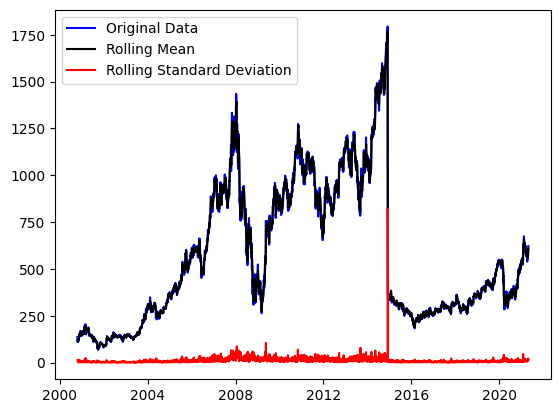

In [41]:
plt.plot(my_data,color='blue',label='Original Data')
plt.plot(mean_log,color='black',label='Rolling Mean')
plt.plot(std_log,color='red',label='Rolling Standard Deviation')
plt.legend(loc='best')

In [42]:
from statsmodels.tsa.stattools  import adfuller

In [43]:
#Augmented DickyFuller Test
result=adfuller(my_data['Close'])
keys=['test_statistics','p_value',"num_lags","num_observations","critical_values","AIC"]

In [44]:
for key,value in zip(keys,result):
  print(f"{key}:{value}")


test_statistics:-2.6851323008507464
p_value:0.07664655509726809
num_lags:1
num_observations:5104
critical_values:{'1%': -3.4316318557684675, '5%': -2.8621064441775963, '10%': -2.5670715184860238}
AIC:47301.52454553559


In [45]:
import numpy as np

In [46]:
first_log=np.log(my_data)

In [47]:
first_log.dropna()

,Close
Date,
2000-10-19,4.919981
2000-10-20,4.838660
2000-10-23,4.709080
2000-10-24,4.693181
2000-10-25,4.764735
...,...
2021-04-23,6.345549
2021-04-26,6.381985
2021-04-27,6.394844


<Axes: xlabel='Date'>

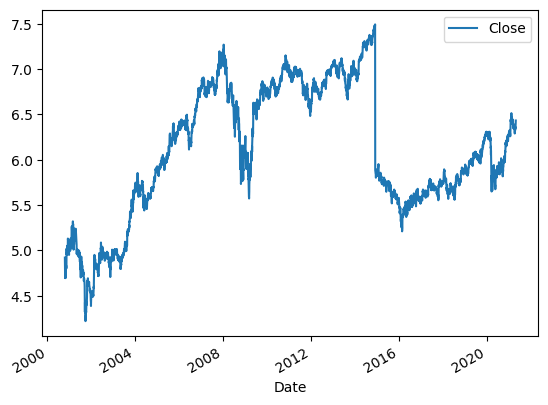

In [48]:
first_log.plot()

In [49]:
new_data=first_log-mean_log

Text(0.5, 1.0, 'Rolling mean and Standard deviation for log_scale data')

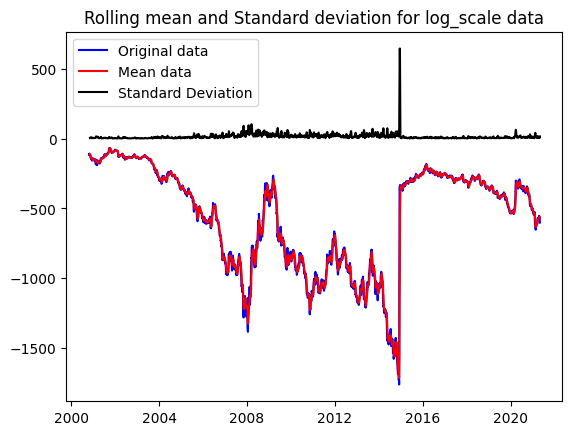

In [50]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Original data')
plt.plot(mean_log,color='red',label='Mean data')
plt.plot(std_log,color='black',label='Standard Deviation')

plt.legend(loc='best')
plt.title("Rolling mean and Standard deviation for log_scale data")

In [51]:
new_data

,Close
Date,
2000-10-19,NaN
2000-10-20,NaN
2000-10-23,NaN
2000-10-24,-116.169319
2000-10-25,-111.172765
...,...
2021-04-23,-560.654451
2021-04-26,-568.455515
2021-04-27,-578.355156


In [52]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

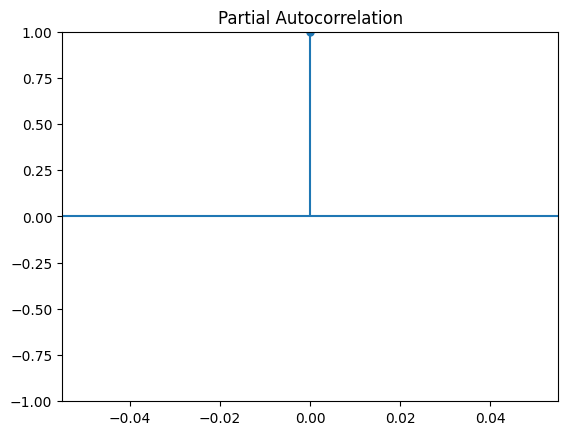

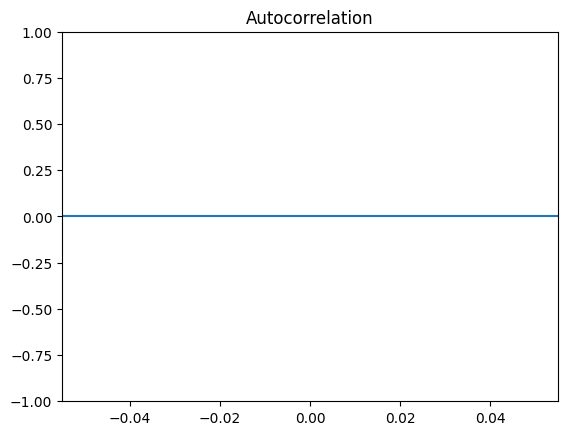

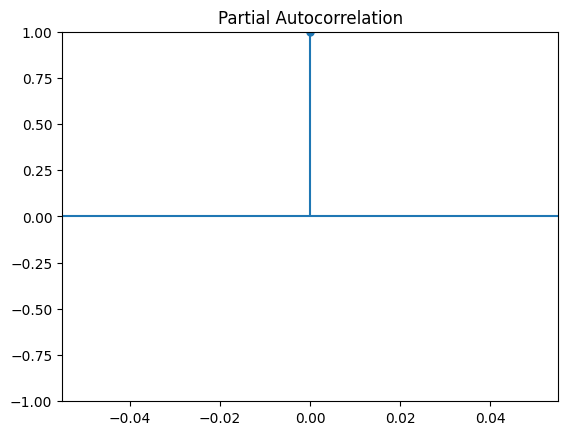

In [53]:
acf_values=acf(new_data)
plot_acf(new_data)
pacf_values=pacf(new_data,nlags=10)
plot_pacf(new_data)

In [54]:
from statsmodels.tsa.arima.model import ARIMA

In [55]:
train=new_df.iloc[:120]['Close']

In [56]:
test=new_df.iloc[120:]

In [57]:
model=ARIMA(train,order=(1,0,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [58]:
model_fit=model.fit()

In [59]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  120
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -757.102
Date:                Sat, 07 Dec 2024   AIC                           1524.204
Time:                        11:20:11   BIC                           1538.142
Sample:                             0   HQIC                          1529.864
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        357.9003     96.312      3.716      0.000     169.132     546.669
ar.L1          0.9925      0.359      2.768      0.006       0.290       1.695
ma.L1         -0.0432      4.628     -0.009      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

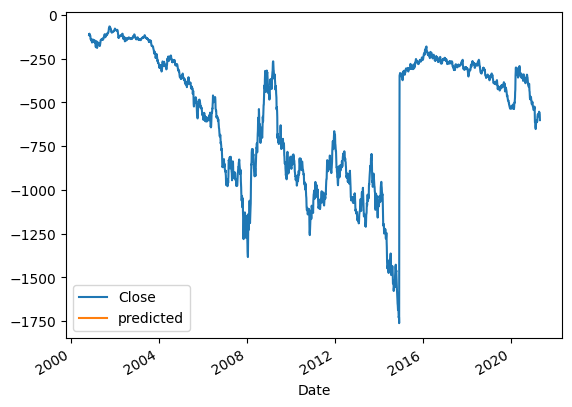

In [60]:
new_data['predicted']=model_fit.predict(start=len(train),end=len(train) + len(test)-1,dynamic=True)
new_data[['Close','predicted']].plot()

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [62]:
model=SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,12))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood opt

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

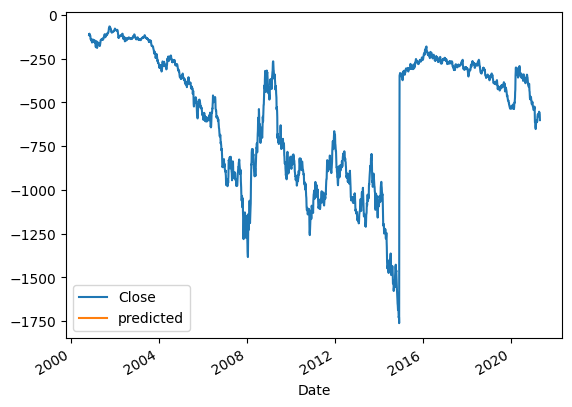

In [63]:
new_data['predicted']=model_fit.predict(start=len(train),end=len(train) + len(test)-1,dynamic=True)
new_data[['Close','predicted']].plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


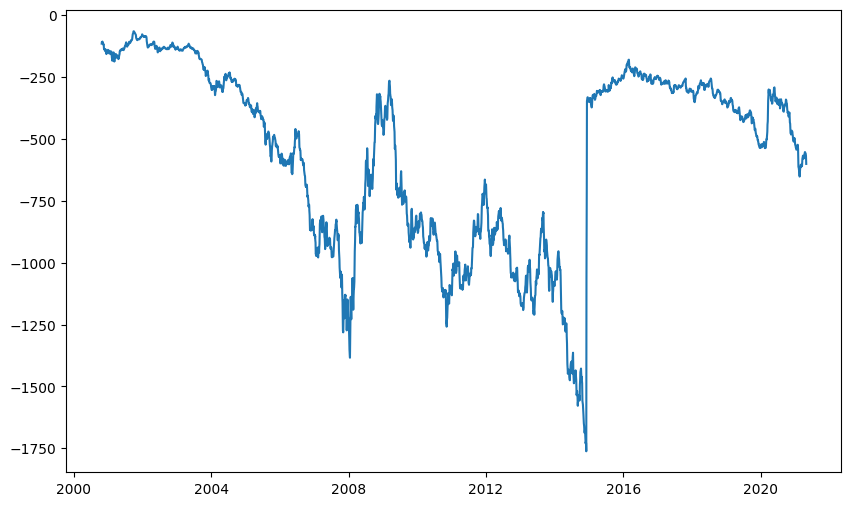

In [64]:
forecast=model_fit.forecast(steps=60)
plt.figure(figsize=(10,6))
plt.plot(new_data.index,new_data['Close'],label='Original Data')

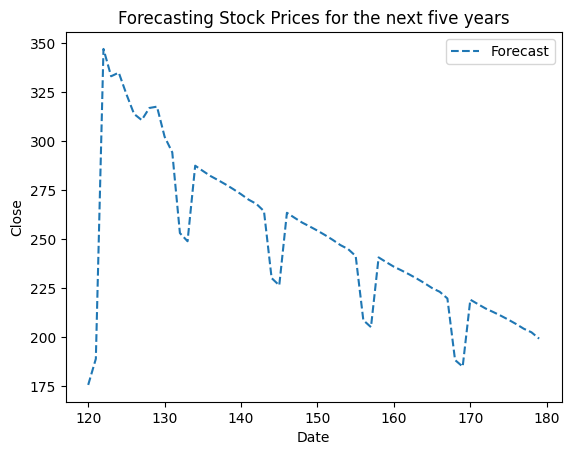

In [65]:
plt.plot(forecast.index,forecast,label='Forecast',linestyle='--')
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Forecasting Stock Prices for the next five years")
plt.legend()